## Collaborative Filtering

Collaborative filtering is a technique used in recommendation systems to make automatic predictions about the preferences of a user by collecting preferences from many users (collaborating). It assumes that if a user A has the same opinion as a user B on an issue, A is more likely to have B's opinion on a different issue.

### 1. Import libraries

In [1]:
# Importing the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial import distance 

### 2. Read data

In [2]:
# Read movie data
movies = pd.read_csv('data/movies.csv')

# Read ratings data
ratings = pd.read_csv('data/ratings.csv')

# Read tags data
tags = pd.read_csv('data/tags.csv')

# Merge ratings and movies datasets
df = pd.merge(ratings, movies, on='movieId', how='inner')

df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### 3. User-Based Collaborative Filtering

In user-based collaborative filtering, recommendations are made based on the preferences of users who are similar to the target user. It involves creating a user-item matrix, where rows represent users, columns represent items, and the matrix entries represent user-item interactions (e.g., ratings).Similarity measures (e.g., cosine similarity) are calculated between users, and predictions for the target user are made based on the preferences of similar users

In [3]:
# Aggregate ratings data by movie
ratings_agg = df.groupby('title')['rating'].agg(['mean', 'count'])

ratings_agg.head()

,mean,count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: xlabel='mean', ylabel='count'>

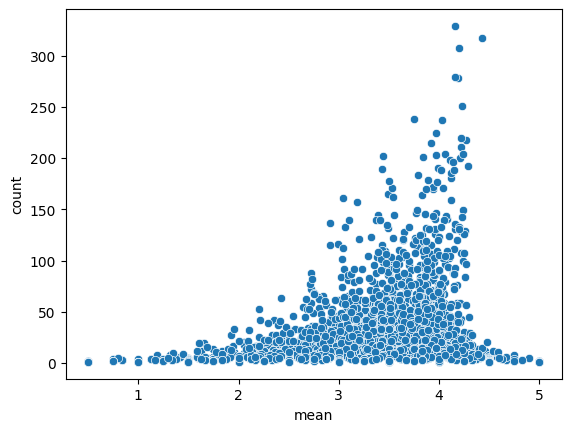

In [5]:
# Visualize the distribution of ratings
sns.scatterplot(x='mean', y='count', data=ratings_agg)

In [17]:
# Aggregate by movie
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()

agg_ratings.head()     

,title,mean_rating,number_of_ratings
0,'71 (2014),4.0,1
1,'Hellboy': The Seeds of Creation (2004),4.0,1
2,'Round Midnight (1986),3.5,2
3,'Salem's Lot (2004),5.0,1
4,'Til There Was You (1997),4.0,2


In [18]:
# Merge data
df_ratings = pd.merge(df, agg_ratings[['title']], on='title', how='inner')
df_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [19]:
# Number of users
print('Number of users: ', len(df_ratings.userId.unique()))

# Number of movies
print('Number of movies: ', len(df_ratings.movieId.unique()))

# Number of ratings
print('Number of ratings: ', len(df_ratings))

# List unique ratings
print('Unique ratings: ', df_ratings.rating.unique())

Number of users:  610
Number of movies:  9724
Number of ratings:  100836
Unique ratings:  [4.  4.5 2.5 3.5 3.  5.  0.5 2.  1.5 1. ]


In [20]:
# Create user-item matrix
user_item_matrix = df_ratings.pivot_table(index='userId', columns='title', values='rating')
user_item_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Normalize user-item matrix
user_item_matrix_norm = user_item_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
user_item_matrix_norm.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.091595,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# User similarity matrix using Pearson correlation
user_similarity = user_item_matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-1.183502e-17,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [35]:
from sklearn.metrics.pairwise import cosine_similarity
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(user_item_matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.00000000e+00,  1.26451574e-03,  5.52577176e-04, ...,
         7.52238457e-02, -2.57125541e-02,  1.09323166e-02],
       [ 1.26451574e-03,  1.00000000e+00,  0.00000000e+00, ...,
        -6.00082818e-03, -6.00909967e-02,  2.49992083e-02],
       [ 5.52577176e-04,  0.00000000e+00,  1.00000000e+00, ...,
        -1.30006374e-02,  0.00000000e+00,  1.95499646e-02],
       ...,
       [ 7.52238457e-02, -6.00082818e-03, -1.30006374e-02, ...,
         1.00000000e+00,  5.07144903e-02,  5.44538770e-02],
       [-2.57125541e-02, -6.00909967e-02,  0.00000000e+00, ...,
         5.07144903e-02,  1.00000000e+00, -1.24714266e-02],
       [ 1.09323166e-02,  2.49992083e-02,  1.95499646e-02, ...,
         5.44538770e-02, -1.24714266e-02,  1.00000000e+00]])

In [36]:
# Choose a user and remove that user from the list
user = 3
user_similarity.drop(index=user, inplace=True)

user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-1.183502e-17,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582
6,-0.291636,NaN,NaN,0.148498,0.043166,1.000000,-0.126595,-0.200062,NaN,0.957427,...,-0.292770,-2.749519e-02,-0.112141,-0.090297,0.100735,-0.049192,0.255639,0.125428,0.193649,0.115580


In [38]:
# Choosing num of similar users
n = 8

# Get top n similar users whose similarity > 0.2
top_n_users = user_similarity[user_similarity[user] > 0.2][user].sort_values(ascending=False)[:n]

top_n_users

userId
95     1.000000
183    1.000000
91     0.977356
362    0.866025
524    0.866025
313    0.833333
580    0.779512
244    0.755929
Name: 3, dtype: float64

In [39]:
# Movies that the target user has watched
user_watched = user_item_matrix_norm[user_item_matrix_norm.index == user].dropna(axis=1)
user_watched

title,2012 (2009),Alien Contamination (1980),Android (1982),Bambi (1942),"Clonus Horror, The (1979)",Conan the Barbarian (1982),Courage Under Fire (1996),Dangerous Minds (1995),Death Race 2000 (1975),"Deer Hunter, The (1978)",...,Saturn 3 (1980),Schindler's List (1993),Snow Dogs (2002),Star Trek: The Motion Picture (1979),The Lair of the White Worm (1988),"Thing, The (1982)",Troll 2 (1990),Tron (1982),Wallace & Gromit: The Best of Aardman Animation (1996),You've Got Mail (1998)
userId,,,,,,,,,,,,,,,,,,,,,
3,-0.430199,0.569801,0.569801,-0.430199,0.458689,0.458689,-0.430199,-0.430199,0.569801,-0.430199,...,0.569801,-0.430199,-0.430199,0.125356,0.569801,0.347578,0.569801,-0.096866,-0.430199,-0.430199


In [40]:
# Movies that similar user watched
similar_user_movies = user_item_matrix_norm[user_item_matrix_norm.index.isin(top_n_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,"'burbs, The (1989)",101 Dalmatians (One Hundred and One Dalmatians) (1961),11:14 (2003),12 Angry Men (1957),"13th Warrior, The (1999)",1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),...,X2: X-Men United (2003),"Year of Living Dangerously, The (1982)",You Only Live Twice (1967),Young Frankenstein (1974),Zero Effect (1998),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
91,-0.310145,NaN,NaN,NaN,NaN,0.134300,NaN,NaN,0.023188,NaN,...,0.134300,NaN,0.1343,0.245411,0.1343,NaN,0.1343,NaN,NaN,NaN
95,-0.265625,-0.015625,NaN,NaN,NaN,NaN,NaN,-0.140625,0.234375,NaN,...,-0.015625,NaN,NaN,NaN,NaN,NaN,NaN,-0.390625,-0.265625,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,-0.193548,NaN,NaN,NaN,NaN,NaN,...,NaN,0.306452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,0.391912,0.141912,NaN,-0.108088,-0.108088,...,NaN,NaN,NaN,-0.108088,NaN,NaN,NaN,NaN,NaN,-0.608088
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216252,NaN,...,NaN,NaN,NaN,NaN,NaN,0.073394,NaN,NaN,NaN,NaN
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135496,NaN,...,NaN,NaN,NaN,0.385496,NaN,NaN,NaN,NaN,NaN,NaN
580,NaN,NaN,0.104485,-0.673293,0.104485,0.104485,NaN,NaN,-0.006626,-0.117737,...,0.215596,NaN,NaN,NaN,NaN,NaN,NaN,0.104485,NaN,NaN


In [41]:
# Remove the watched movie from the movie list
similar_user_movies.drop(user_watched.columns,axis=1, inplace=True, errors='ignore')
similar_user_movies

title,"'burbs, The (1989)",101 Dalmatians (One Hundred and One Dalmatians) (1961),11:14 (2003),12 Angry Men (1957),"13th Warrior, The (1999)",1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),...,X2: X-Men United (2003),"Year of Living Dangerously, The (1982)",You Only Live Twice (1967),Young Frankenstein (1974),Zero Effect (1998),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
91,-0.310145,NaN,NaN,NaN,NaN,0.134300,NaN,NaN,0.023188,NaN,...,0.134300,NaN,0.1343,0.245411,0.1343,NaN,0.1343,NaN,NaN,NaN
95,-0.265625,-0.015625,NaN,NaN,NaN,NaN,NaN,-0.140625,0.234375,NaN,...,-0.015625,NaN,NaN,NaN,NaN,NaN,NaN,-0.390625,-0.265625,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,-0.193548,NaN,NaN,NaN,NaN,NaN,...,NaN,0.306452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,0.391912,0.141912,NaN,-0.108088,-0.108088,...,NaN,NaN,NaN,-0.108088,NaN,NaN,NaN,NaN,NaN,-0.608088
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216252,NaN,...,NaN,NaN,NaN,NaN,NaN,0.073394,NaN,NaN,NaN,NaN
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135496,NaN,...,NaN,NaN,NaN,0.385496,NaN,NaN,NaN,NaN,NaN,NaN
580,NaN,NaN,0.104485,-0.673293,0.104485,0.104485,NaN,NaN,-0.006626,-0.117737,...,0.215596,NaN,NaN,NaN,NaN,NaN,NaN,0.104485,NaN,NaN


In [65]:
# Get movie recommendations for the target user
recommendations = similar_user_movies.mean().sort_values(ascending=False)

# Get top 10 movie recommendations
top_10_recommendations = recommendations[:10]
top_10_recommendations


title
Lord of the Rings, The (1978)                           0.391912
Brotherhood of the Wolf (Pacte des loups, Le) (2001)    0.391912
Alien Nation (1988)                                     0.391912
Exorcist, The (1973)                                    0.391912
Flash Gordon (1980)                                     0.391912
Reform School Girls (1986)                              0.391912
Transformers: The Movie (1986)                          0.391912
Black Hawk Down (2001)                                  0.391912
Clash of the Titans (1981)                              0.391912
William Shakespeare's Romeo + Juliet (1996)             0.391912
dtype: float64

#### Recommendations using cosine similarity

In [49]:
# Create a pivot table with userId as rows, movieId as columns, and ratings as values
pivot_table = df.pivot_table(index='userId', columns='title', values='rating')

# Fill NaN values with 0 (assuming unrated movies have a rating of 0)
pivot_table = pivot_table.fillna(0)

# Calculate the cosine similarity between users
user_similarity = cosine_similarity(pivot_table)

# Create a DataFrame with the similarity values
user_similarity_df = pd.DataFrame(user_similarity, index=pivot_table.index, columns=pivot_table.index)


In [59]:
# Function to get movie recommendations for a user
def get_user_recommendations(user_id, user_ratings):
    # Filter out movies the user has already rated
    unrated_movies = user_ratings[user_ratings == 0].index
    
    # Calculate similarity scores and filter out NaN or negative values
    similar_scores = user_similarity_df[user_id] * (user_ratings - 2.5)
    similar_users = similar_scores.loc[unrated_movies].sort_values(ascending=False)
    
    return similar_users

In [60]:
# Get movie recommendations for a user who rated some movies
user_id = 3
user_ratings = pivot_table.loc[user_id]

In [61]:
user_ratings[user_ratings > 0][:10]

title
2012 (2009)                   0.5
Alien Contamination (1980)    5.0
Android (1982)                5.0
Bambi (1942)                  0.5
Clonus Horror, The (1979)     4.5
Conan the Barbarian (1982)    4.5
Courage Under Fire (1996)     0.5
Dangerous Minds (1995)        0.5
Death Race 2000 (1975)        5.0
Deer Hunter, The (1978)       0.5
Name: 3, dtype: float64

In [62]:
recommendations = []

for movie_title, rating in user_ratings.items():
    if rating == 0:  # Only consider movies the user hasn't rated
        recommendations.append(get_user_recommendations(user_id, user_ratings))

# Concatenate the list of recommendations outside the loop
recommendations = pd.concat(recommendations)

In [63]:
# Display top N recommendations
top_recommendations = recommendations.sort_values(ascending=False).head(10)
print(top_recommendations)

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
'Tis the Season for Love (2015)           NaN
'burbs, The (1989)                        NaN
'night Mother (1986)                      NaN
(500) Days of Summer (2009)               NaN
*batteries not included (1987)            NaN
Name: 3, dtype: float64
